# Profiling / clustering

In [24]:
import os
import pandas as pd
import datetime
import seaborn as sns; sns.set_theme(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import autocorrelation_plot
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# Preprocesamiento y modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from pmdarima.arima import auto_arima

from numpy import array
from numpy import hstack

from joblib import dump,load
import h5py
import dill

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

In [25]:
### Load dataset

path_file = "D:/DATA SCIENCE/Tech test Fraud/dataset/unified/cleaned_data.csv"
df = pd.read_csv (path_file, sep = ',')

In [26]:
### Select two variables for analyze and evlauate the generation of clusters

cat_df = df[["DIRECTORATE", "ORIGINAL GROSS AMT"]]

The idea in this parte is focus the analysis on the detection of well-formed clusters. In the same way, it is about identifying atypical values since characterizing this type of movements can be broadly related to the detection of fraud.

The next steps focus on defining clusters according to different clustering techniques and evaluating whether the results make sense or produce meaningful clusters. For this, we will use the following as work fields: "DIRECTORATE", "ORIGINAL GROSS AMT", "TRANS_DATE_YM".

In [27]:
directorate_selected_df = df[["DIRECTORATE", "ORIGINAL GROSS AMT", "TRANS_DATE_YM"]]
directorate_time_1_df = directorate_selected_df.groupby(by=["DIRECTORATE", "TRANS_DATE_YM"]).agg(["sum", "mean", "count"])
directorate_full_time = directorate_selected_df[["DIRECTORATE", "ORIGINAL GROSS AMT"]].groupby(by=["DIRECTORATE"]).agg(["sum", "mean", "count", "var"])

In [28]:
cluster_dummy_try_df = directorate_time_1_df.reset_index(inplace=False)

In [29]:
cluster_dummy_try_df.columns = ["DIRECTORATE", "TRANS_DATE_YM", "sum", "mean", "count"]

In [30]:
cluster_dummy_try_df["DIRECTORATE"].unique()

array(['Adult Social Care and Health', 'CYP&F', 'CYP&F SCHOOLS',
       'CYP&F Schools', 'Corporate Resources', 'DEVELOPMENT',
       'Development', 'Local Services'], dtype=object)

In [31]:
#### Based in my previous analysis, I put the encoding, but if add more months this struct will change.

map_encoding = {
    'Adult Social Care and Health': 1,
    'CYP&F': 2,
    'CYP&F SCHOOLS': 3,
    'CYP&F Schools': 4,
    'Corporate Resources': 5,
    'DEVELOPMENT': 6,
    'Development': 7,
    'Local Services': 8,
 #   "": 9, #just in case
 #   np.nan: 9
}

In [32]:
def map_encoding_directorate(x):
    return map_encoding[x]

In [33]:
map_encoding_category_temp = {
    
}

categories = df["TRANS CAC DESC 1"].str.strip().unique()

for i in range(len(categories)):
    map_encoding_category_temp[str(categories[i])] = i + 1

In [34]:
map_encoding_category_temp

{'Vehicle Fuel': 1,
 'Supplies & Sev Mic': 2,
 'Equip Other': 3,
 'Vehicle Excise Lics': 4,
 'Other Services': 5,
 'Licences & Permits': 6,
 'Purchases Food': 7,
 'Photocopying': 8,
 'Hospitality': 9,
 'Vehicle OthrunCosts': 10,
 "Mat'l Raw/Drct": 11,
 'Travel Taxis': 12,
 'Postage': 13,
 'Equip Operational': 14,
 'Accomodation Hire': 15,
 'Training Other': 16,
 'Laundry': 17,
 'Conference Fees Subs Foreign': 18,
 'Travel Bus/Rail': 19,
 'Travel Foreign': 20,
 'Electricity': 21,
 'Car Parking': 22,
 'MaChRobes&CivicGifts': 23,
 'Prof Fees other': 24,
 'Contract Meals': 25,
 'Legal Fee Other': 26,
 'Computing Other': 27,
 'Conference Fees Subs UK': 28,
 'Books': 29,
 'Stationery': 30,
 'Oth Indirect EmpExps': 31,
 'Bldg RM Departmental': 32,
 'Gas': 33,
 'Water Services': 34,
 'Phon NonCentrx Lines': 35,
 'Subscriptions': 36,
 "Fire/Sec'yAlarm/Eq't": 37,
 'Visits Expenditure': 38,
 'Personal Needs': 39,
 'In Year Credits': 40,
 'Cleaning Materials': 41,
 'Bldg RM Fair Fund NS': 42,
 'Ve

In [35]:
map_encoding_category_temp[np.nan] = 104

In [36]:
def map_encoding_category(x):
    return map_encoding_category_temp[x]

In [37]:
map_encoding_card_temp = {}
cards = df["TRANS CAC DESC 1"].str.strip().unique()

for i in range(len(categories)):
    map_encoding_category_temp[str(categories[i])] = i + 1

I try to make a cluster characterization of the spend with the k-neighborhoods algorithm based on the DIRECTORATE column taking into account the month, but I do not find a relevant application of this approach.

In [38]:
cluster_dummy_try_df

,DIRECTORATE,TRANS_DATE_YM,sum,mean,count
0,Adult Social Care and Health,2018-07,9774.73,61.865380,158
1,Adult Social Care and Health,2018-08,8516.62,61.270647,139
2,Adult Social Care and Health,2018-09,10704.11,73.315822,146
3,Adult Social Care and Health,2018-10,19385.08,115.387381,168
4,Adult Social Care and Health,2018-11,23428.68,128.025574,183
5,Adult Social Care and Health,2018-12,7148.92,63.264779,113
6,Adult Social Care and Health,2019-01,182.31,60.770000,3
7,CYP&F,2018-07,7639.84,82.148817,93
8,CYP&F,2018-08,3956.27,63.810806,62
9,CYP&F,2018-09,4346.70,53.662963,81


In [39]:
cluster_dummy_try_df["Directorate_encoded"] = cluster_dummy_try_df.apply(lambda x:  map_encoding_directorate(x["DIRECTORATE"]), axis=1)

In [40]:
cluster_dummy_try_df

,DIRECTORATE,TRANS_DATE_YM,sum,mean,count,Directorate_encoded
0,Adult Social Care and Health,2018-07,9774.73,61.865380,158,1
1,Adult Social Care and Health,2018-08,8516.62,61.270647,139,1
2,Adult Social Care and Health,2018-09,10704.11,73.315822,146,1
3,Adult Social Care and Health,2018-10,19385.08,115.387381,168,1
4,Adult Social Care and Health,2018-11,23428.68,128.025574,183,1
5,Adult Social Care and Health,2018-12,7148.92,63.264779,113,1
6,Adult Social Care and Health,2019-01,182.31,60.770000,3,1
7,CYP&F,2018-07,7639.84,82.148817,93,2
8,CYP&F,2018-08,3956.27,63.810806,62,2
9,CYP&F,2018-09,4346.70,53.662963,81,2


It can be seen that in general terms, the majority of transactions are for CYP&F SCHOOLS while the smallest transactions occur for the Development and CYP&F sector.

In [41]:
### I test the K-means algorithms to start the clusterization. First, define a cluster number of 3 to see first results.

kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_dummy_try_df[["Directorate_encoded", "sum"]])

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

<Axes: xlabel='Directorate_encoded', ylabel='sum'>

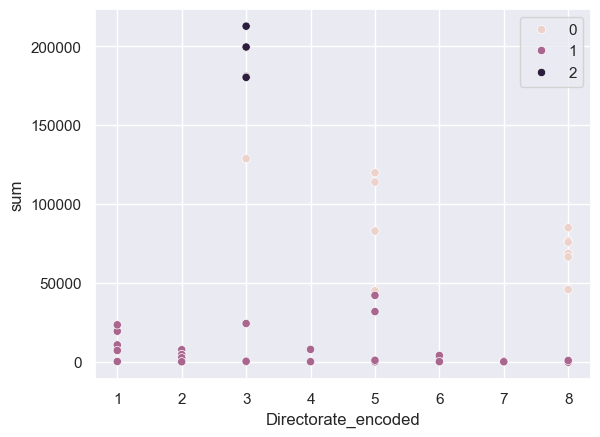

In [43]:
sns.scatterplot(data=cluster_dummy_try_df, x="Directorate_encoded", y="sum", hue=kmeans.labels_)

the same information is presented without the clustering labels.

<Axes: xlabel='Directorate_encoded', ylabel='mean'>

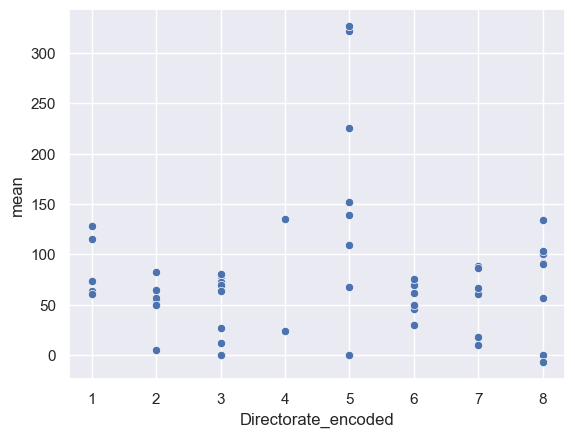

In [44]:
sns.scatterplot(data=cluster_dummy_try_df, x="Directorate_encoded", y="mean")

It seems that there is no well-defined clustering, that is, the last process does not give good results.

I try again focussed in observe all the data from a different approach

In [45]:
cluster_dummy_try_2_df = df.copy()

In [46]:
cluster_dummy_try_2_df.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,TRANS TAX RATE,TRANS TAX AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,DIRECTORATE,TRANS_DATE_YM,TRANS_DATE_Y,TRANS_DATE_M,TRANS_DATE_D
0,2018-08-02,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-08,2018,8,2
1,2018-07-26,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-07,2018,7,26
2,2018-07-20,VR,60.0,GBP,60.0,GBP,20.0,10.00,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-07,2018,7,20
3,2018-07-12,VZ,75.0,GBP,75.0,GBP,0.0,0.00,hmcourts-service.g,************8998,MC70,Supplies & Sev Mic,RV3T0,Mental Health Management Budget,A00,Adult Social Care and Health,2018-07,2018,7,12
4,2018-07-09,VZ,75.0,GBP,75.0,GBP,0.0,0.00,hmcourts-service.g,************8998,MC70,Supplies & Sev Mic,RV3T0,Mental Health Management Budget,A00,Adult Social Care and Health,2018-07,2018,7,9


I encoded the principal variables that I was thinking that are important for the clustering task.

In [47]:
cluster_dummy_try_2_df["Directorate_encoded"] = cluster_dummy_try_2_df.apply(lambda x:  map_encoding_directorate(x["DIRECTORATE"]), axis=1)

In [48]:
cluster_dummy_try_2_df["category_encoded"] = cluster_dummy_try_2_df.apply(lambda x:  map_encoding_category(x["TRANS CAC DESC 1"]), axis=1)

<Axes: xlabel='Directorate_encoded', ylabel='ORIGINAL GROSS AMT'>

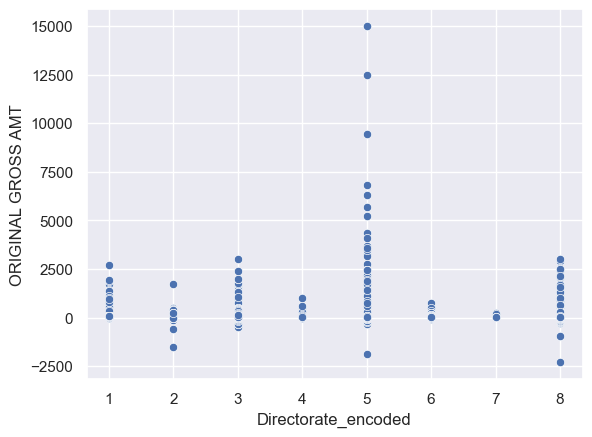

In [49]:
sns.scatterplot(data=cluster_dummy_try_2_df, x="Directorate_encoded", y="ORIGINAL GROSS AMT")

In [50]:
cluster_dummy_try_2_df["ORIGINAL GROSS AMT"] = cluster_dummy_try_2_df["ORIGINAL GROSS AMT"].fillna(0)

In [51]:
kmeans_Directorate = KMeans(n_clusters=4, random_state=0).fit(cluster_dummy_try_2_df[["ORIGINAL GROSS AMT", "Directorate_encoded"]])

<Axes: xlabel='Directorate_encoded', ylabel='ORIGINAL GROSS AMT'>

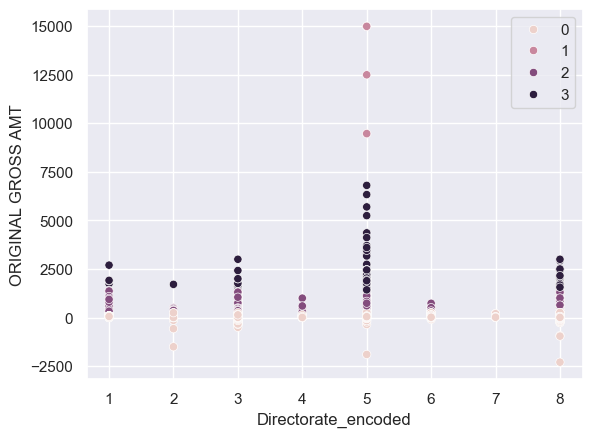

In [52]:
sns.scatterplot(data=cluster_dummy_try_2_df, x="Directorate_encoded", y="ORIGINAL GROSS AMT", hue=kmeans_Directorate.labels_)

In [53]:
kmeans_Directorate = KMeans(n_clusters=5, random_state=0).fit(cluster_dummy_try_2_df[["ORIGINAL GROSS AMT", "Directorate_encoded"]])

<Axes: xlabel='Directorate_encoded', ylabel='ORIGINAL GROSS AMT'>

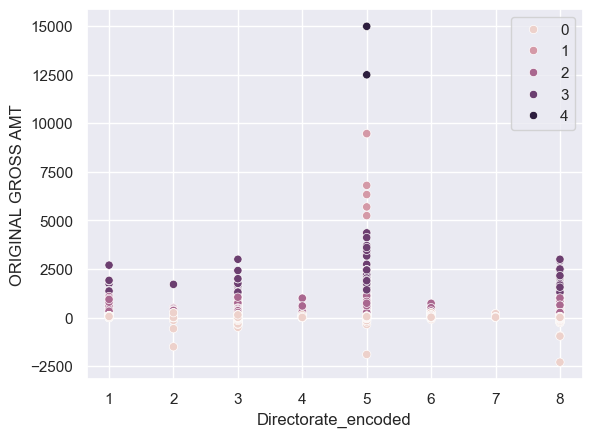

In [54]:
sns.scatterplot(data=cluster_dummy_try_2_df, x="Directorate_encoded", y="ORIGINAL GROSS AMT", hue=kmeans_Directorate.labels_)

I found that this representation of clustering does not represent in a well formatted the clustering possibilities.

 I try to see the data in another type of graphical representation like heat maps.

category vs spend in a single transaction

<Axes: xlabel='category_encoded', ylabel='ORIGINAL GROSS AMT'>

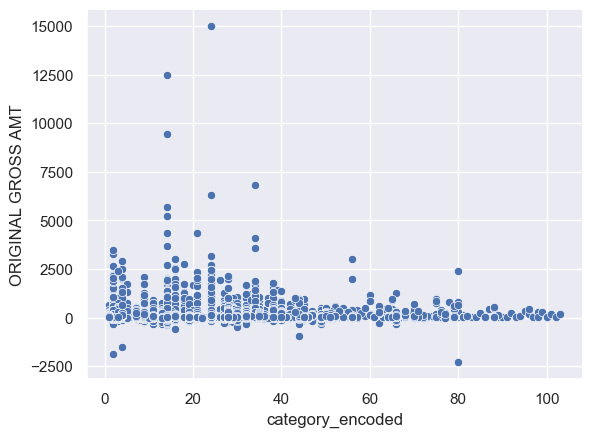

In [55]:
sns.scatterplot(data=cluster_dummy_try_2_df, x="category_encoded", y="ORIGINAL GROSS AMT")

then I try to visualize how are connected the directorate vs the category spend in a single transaction.

<Axes: xlabel='Directorate_encoded', ylabel='category_encoded'>

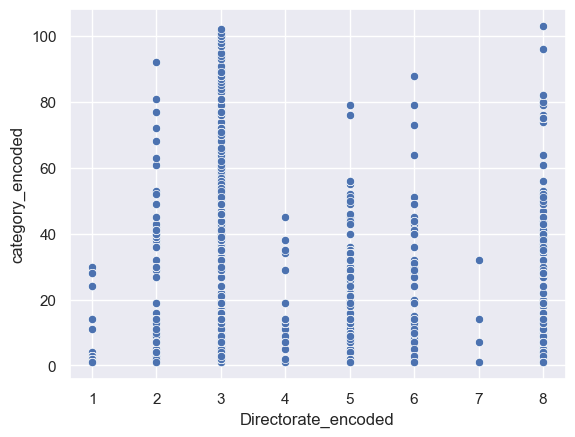

In [56]:
sns.scatterplot(data=cluster_dummy_try_2_df, x="Directorate_encoded", y="category_encoded")

Now, we have more information about the distribution of the cross data. 

That could be more significant if I add another variable like total spend, mean spend, or a number of transactions.

In [57]:
heat_map_try = cluster_dummy_try_2_df[["Directorate_encoded", "category_encoded", "ORIGINAL GROSS AMT"]].groupby(by=["Directorate_encoded", "category_encoded"]).agg("sum").reset_index(inplace=False)
heat_map_try.columns = ["Directorate_encoded", "category_encoded", "total_spend"]

In [58]:
heat_map_try

,Directorate_encoded,category_encoded,total_spend
0,1,1,51206.58
1,1,2,3667.99
2,1,3,438.55
3,1,4,60.00
4,1,11,118.80
...,...,...,...
292,8,80,2017.25
293,8,81,199.80
294,8,82,343.74
295,8,96,626.40


#### Analysis with directorate vs spend category vs total_spend

The idea is analyze the relation between the DIRECTORATE column with spend category (TRANS CAC DESC 1) using as measure of color the total spend.

<Axes: xlabel='Directorate_encoded', ylabel='category_encoded'>

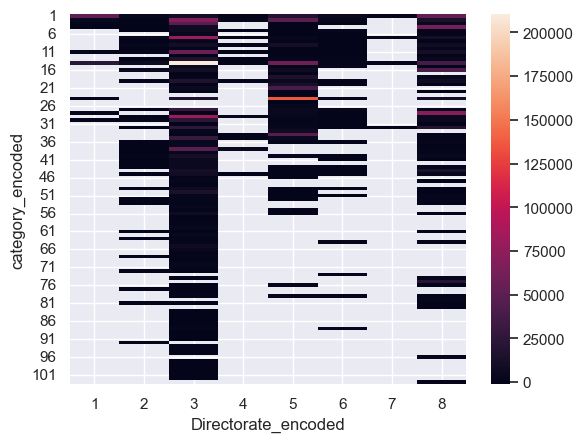

In [59]:
sns.heatmap(heat_map_try.pivot(index="category_encoded",columns= "Directorate_encoded",values="total_spend"))

In [60]:
heat_map_try_2 = cluster_dummy_try_2_df[["Directorate_encoded", "category_encoded", "ORIGINAL GROSS AMT"]].groupby(by=["Directorate_encoded", "category_encoded"]).agg("mean").reset_index(inplace=False)
heat_map_try_2.columns = ["Directorate_encoded", "category_encoded", "mean_spend"]

#### Directorate vs spend category vs avg_spend

We want to perform the same analysis but instead of total spend we work with average spend.

<Axes: xlabel='Directorate_encoded', ylabel='category_encoded'>

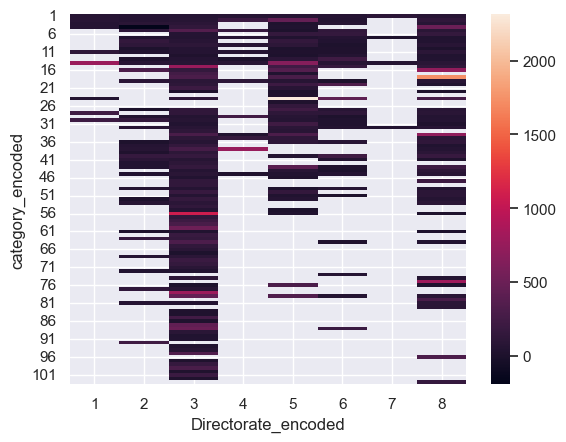

In [61]:
sns.heatmap(heat_map_try_2.pivot(index="category_encoded",columns= "Directorate_encoded", values="mean_spend"))

#### Directorate vs spend category vs number_of_movements

<Axes: xlabel='Directorate_encoded', ylabel='category_encoded'>

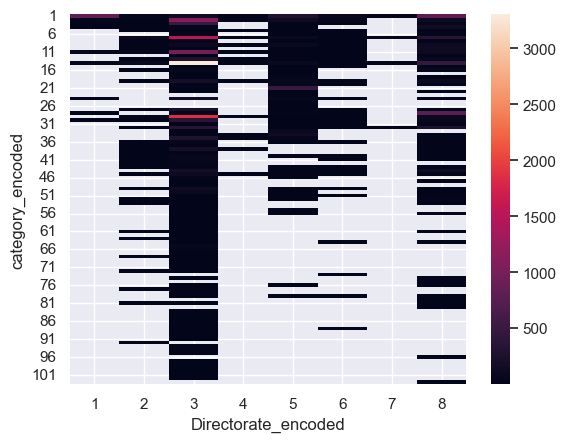

In [62]:
heat_map_try_3 = cluster_dummy_try_2_df[["Directorate_encoded", "category_encoded", "ORIGINAL GROSS AMT"]].groupby(by=["Directorate_encoded", "category_encoded"]).agg("count").reset_index(inplace=False)
heat_map_try_3.columns = ["Directorate_encoded", "category_encoded", "count"]
sns.heatmap(heat_map_try_3.pivot(index="category_encoded",columns= "Directorate_encoded", values="count"))

Taking into account the last analysis, I encode the rest of columns in order to analyze if they are useful for work with the clusterization

#### Based on card number

In [71]:
### Converting categorical variables about cards into numerical ones

# Frequency of transactions made by each unique card
card_vc = df['CARD NUMBER'].value_counts()

# Transforming it into a DataFrame
card_vc = pd.DataFrame(card_vc)
card_vc = card_vc.reset_index()
card_vc.columns = ['unique_card','counts']

In [72]:
card_vc

,unique_card,counts
0,************3929,779
1,************6387,241
2,************2240,218
3,************8192,203
4,************7490,183
...,...,...
711,************2793,1
712,************0180,1
713,************9146,1
714,************7792,1


In [73]:
df['CARD NUMBER']

0        ************5804
1        ************5804
2        ************5804
3        ************8998
4        ************8998
               ...       
20790    ************5450
20791    ************4599
20792    ************4599
20793    ************4599
20794    ************8673
Name: CARD NUMBER, Length: 20795, dtype: object

In [74]:
len(df['CARD NUMBER'])
print(df['CARD NUMBER'][0])
print(card_vc['unique_card'][0])
print(df['ORIGINAL GROSS AMT'][0])
print(card_vc['counts'][0])

print('m iterations = ', len(card_vc['unique_card']))
print('i iterations = ', len(df['CARD NUMBER']))

************5804
************3929
68.0
779
m iterations =  716
i iterations =  20795


In [75]:
#df[["DIRECTORATE", "TRANS CAC DESC 1", "month_year", "ORIGINAL GROSS AMT"]].groupby(by=["DIRECTORATE","TRANS CAC DESC 1", ]).agg(["sum", "mean", "count"])

#### TAke 2 min for the current dataset (6 months)

# Average amount of transactions by each unique card
sum_tr = 0
card_trans = pd.DataFrame()
j = 0
for m in card_vc['unique_card']:
  for i in range(len(df['CARD NUMBER'])):
    if df['CARD NUMBER'][i] == m:
      sum_tr += df['ORIGINAL GROSS AMT'][i]
  #card_trans = card_trans.append([(sum_tr/card_vc['counts'][j])])
  card_trans = pd.concat([card_trans,pd.DataFrame([(sum_tr/card_vc['counts'][j])])])
  j += 1

# Assembling previous data
card_data = pd.DataFrame()
card_data['card_name'] = card_vc['unique_card']
card_data['trans_avg'] = card_trans.values.reshape(-1,1)
card_data['frequency'] = card_vc['counts']

card_data = card_data.set_index(card_data.card_name)
card_data = card_data.drop(['card_name'], axis = 1)

card_data


,trans_avg,frequency
card_name,,
************3929,1.228624e+02,779
************6387,4.701510e+02,241
************2240,5.752691e+02,218
************8192,6.806025e+02,203
************7490,8.387060e+02,183
...,...,...
************2793,1.918515e+06,1
************0180,1.918600e+06,1
************9146,1.918744e+06,1


Text(0, 0.5, 'Cluster inertia')

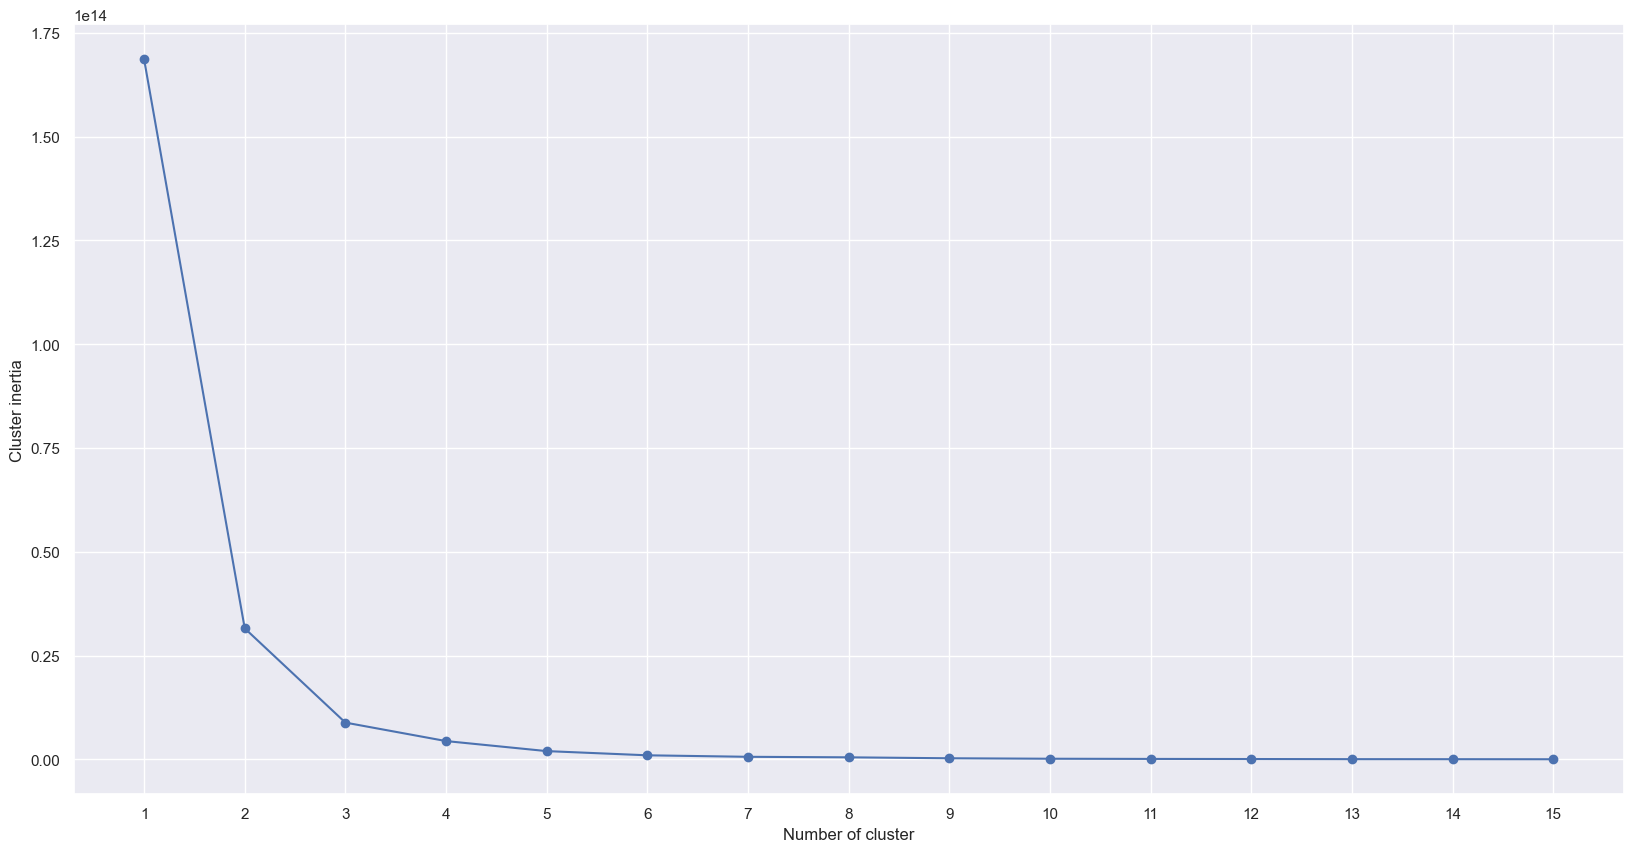

In [76]:
# Scaling the frequency of transactions by means amount of transactions
card_tr = card_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(card_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

Text(0, 0.5, 'The average transactions made by each person')

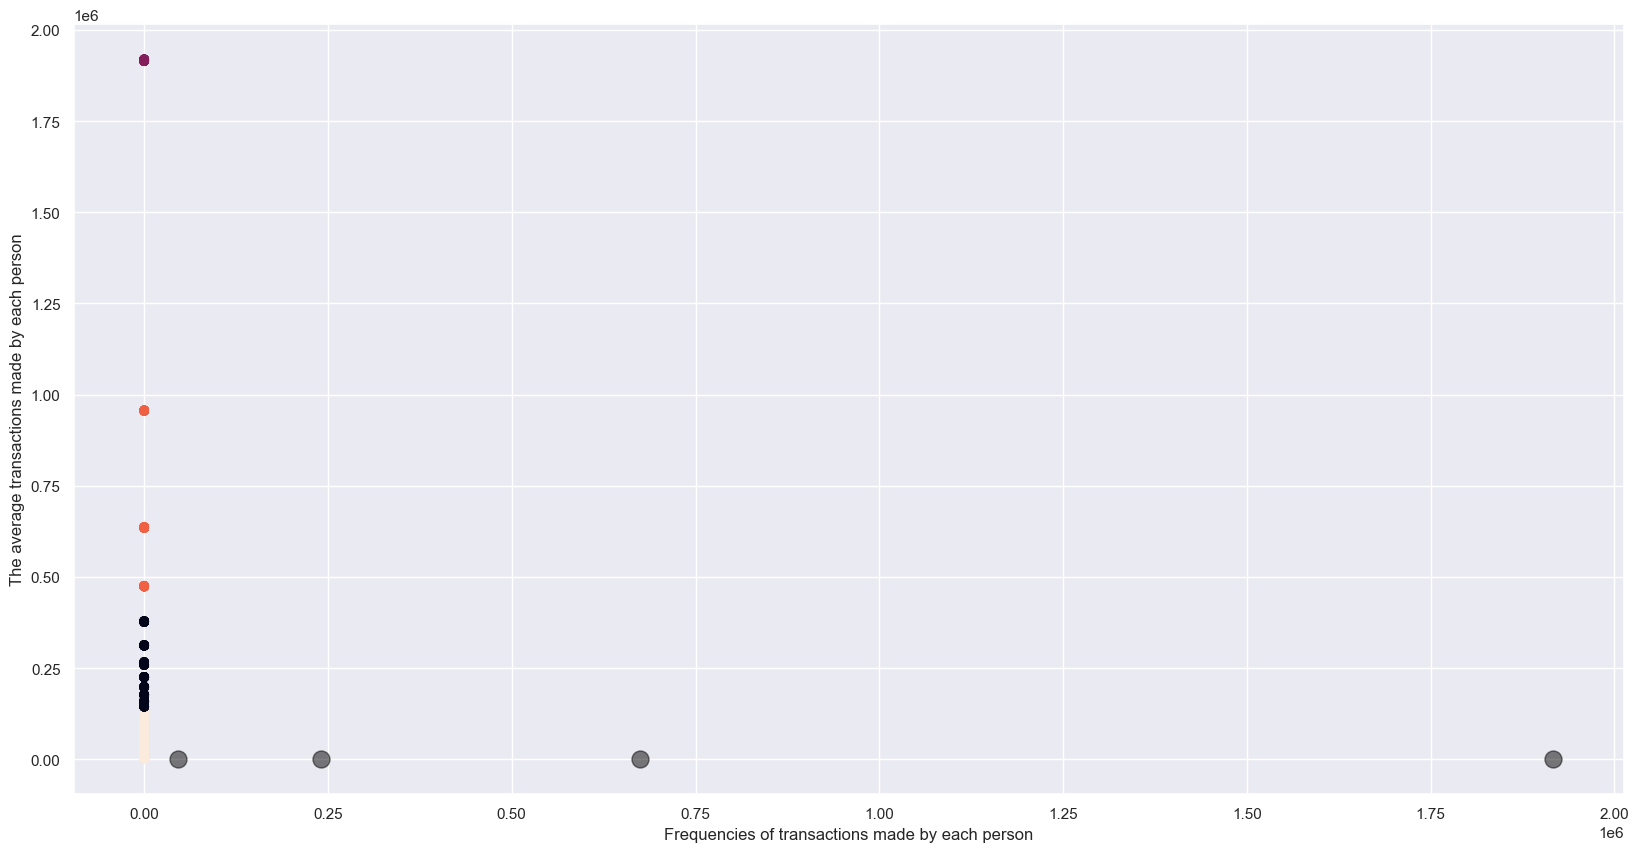

In [77]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(card_tr)
kmeans_predict = kmeans_model.predict(card_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(card_tr[:,1],card_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transactions made by each person')

#### Based on merchants

In [78]:
### Converting categorical variables about marchants into numerical ones

# Frequency of transactions made in favor of ech unique merchant
merchant_vc = df['MERCHANT NAME'].value_counts()

# Transforming it into a DataFrame
merchant = pd.DataFrame(merchant_vc)
merchant = merchant.reset_index()
merchant.columns = ['unique_merchant','counts']
merchant

,unique_merchant,counts
0,amzn mktp uk,989
1,amazon uk marketplace,567
2,asda groceries online,506
3,amazon.co.uk,361
4,amzn mktp uk amazon.co.uk,268
...,...,...
5586,amzn mktp ukmt46r5au4,1
5587,amazon.co.ukmt2ak9nn4 am,1
5588,amazon.co.ukmt4ld4tu4 am,1
5589,amzn mktp ukmt3s600p4,1


In [79]:
print(len(df['MERCHANT NAME']))
print(df['MERCHANT NAME'][0])
print(df['ORIGINAL GROSS AMT'][0])
print(merchant['counts'][0])

print('m iterations = ', len(merchant['unique_merchant']))
print('i iterations = ', len(df['MERCHANT NAME']))

20795
beeches road servi
68.0
989
m iterations =  5591
i iterations =  20795


In [80]:
#### TAke 7 min for the current dataset (6 months)

var_num = df.select_dtypes(include=['float64', 'int64']).columns
var_cat = df.select_dtypes(include=['object']).columns

# Creo una copia de seguridad para conservar los datos originales también
data_2020_std = df.copy(deep=True)

# Normalizar variables numéricas
scaler = StandardScaler()
data_2020_std[var_num] = scaler.fit_transform(df[var_num])

# Concatenar las variables numéricas normalizadas y las categóricas
data_cluster = pd.concat([data_2020_std[var_num], data_2020_std[var_cat]], axis=1)

# Especificar el índice de las columnas categóricas
categorical_idx = [data_cluster.columns.get_loc(col) for col in var_cat]

# Técnica del codo para determinar el número de clusters
cost = [] 
K = range(2,6) 
for k in list(K): 
    kproto = KPrototypes(n_clusters=k, init = "random", n_init = 3, verbose=1,max_iter=50) 
    kproto.fit_predict(data_cluster, categorical=categorical_idx) 
    cost.append(kproto.cost_) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 6310, ncost: 202061.1369530428
Run: 1, iteration: 2/50, moves: 559, ncost: 201834.93603492482
Run: 1, iteration: 3/50, moves: 22, ncost: 201825.81918079036
Run: 1, iteration: 4/50, moves: 1, ncost: 201825.78492725632
Run: 1, iteration: 5/50, moves: 0, ncost: 201825.78492725632
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 189, ncost: 209194.55100642663
Run: 2, iteration: 2/50, moves: 56, ncost: 208302.98274671007
Run: 2, iteration: 3/50, moves: 32, ncost: 207755.93390342654
Run: 2, iteration: 4/50, moves: 25, ncost: 206939.44446266544
Run: 2, iteration: 5/50, moves: 24, ncost: 205815.74121939507
Run: 2, iteration: 6/50, moves: 1, ncost: 205810.92842303505
Run: 2, iteration: 7/50, moves: 0, ncost: 205810.92842303505
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration

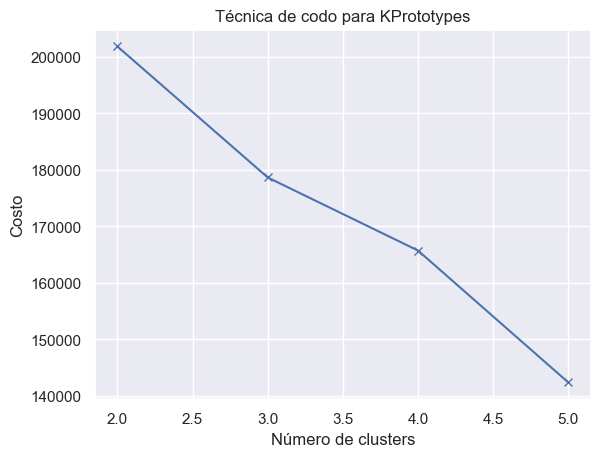

In [81]:
plt.plot(K, cost, 'x-') 
plt.xlabel('Número de clusters') 
plt.ylabel('Costo') 
plt.title('Técnica de codo para KPrototypes') 
plt.show()

In [82]:
#### TAke 3 min for the current dataset (6 months)

# Aplicar el algoritmo K-Prototypes
kproto = KPrototypes(n_clusters=5, init='random', n_init=5, verbose=2, max_iter=50)
clusters = kproto.fit_predict(data_cluster.values, categorical=categorical_idx )

# Agregar las etiquetas al DataFrame original
data_cluster['cluster'] = clusters
df['cluster'] = data_cluster['cluster']

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 5233, ncost: 183158.30600165803
Run: 1, iteration: 2/50, moves: 2324, ncost: 181456.2394386696
Run: 1, iteration: 3/50, moves: 1000, ncost: 181046.99520783327
Run: 1, iteration: 4/50, moves: 672, ncost: 180549.68106487268
Run: 1, iteration: 5/50, moves: 373, ncost: 180457.8198172925
Run: 1, iteration: 6/50, moves: 134, ncost: 180444.44258242275
Run: 1, iteration: 7/50, moves: 67, ncost: 180440.62616854813
Run: 1, iteration: 8/50, moves: 264, ncost: 180322.08708455527
Run: 1, iteration: 9/50, moves: 82, ncost: 180319.14699565707
Run: 1, iteration: 10/50, moves: 58, ncost: 180316.03801047013
Run: 1, iteration: 11/50, moves: 38, ncost: 180314.93700974618
Run: 1, iteration: 12/50, moves: 32, ncost: 180314.28147582777
Run: 1, iteration: 13/50, moves: 31, ncost: 180313.71445197027
Run: 1, iteration: 14/50, moves: 46, ncost: 180311.41501489416
Run: 1, iteration: 15/50, moves: 147, n

In [83]:
# fig = px.scatter_3d(df, x='TRANS_DATE_M', y='TRANS_DATE_D', z='BILLING GROSS AMT', color='cluster')
# fig.show()

According to these results, it can be seen that the generated clusters manage to detect atypical data according to the BILLING GROSS AMT. However, it is not possible to detect a clear separation between the other clusters. This may be due to the variables that are being graphed. Another way to visualize the results would be to apply dimensionality reduction techniques when coding the categorical variables and in this way observe if the clusters do present a clear separation.

## Testing the One-Class SVM

<Axes: >

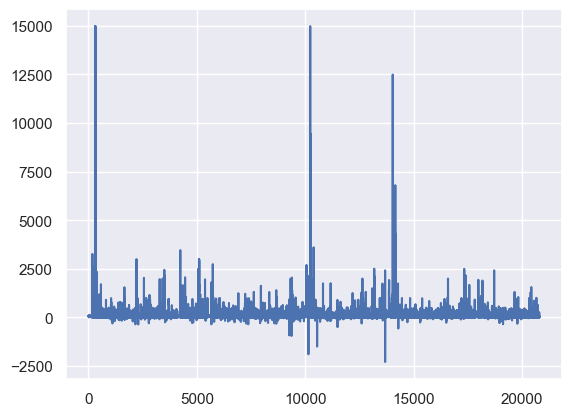

In [84]:
df['ORIGINAL GROSS AMT'].plot()

In [85]:
# Splitting the dataset time series data into training and testing datasets (70%+30%)

train_set = df.iloc[0:int(len(df)*0.7),2]
test_set = df.iloc[int(len(df)*0.7)+1:len(df),2]

<Axes: >

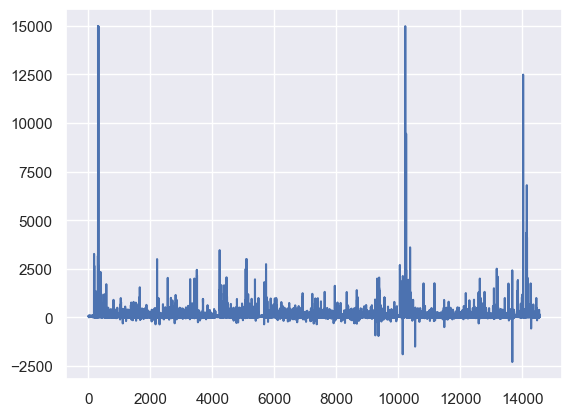

In [86]:
train_set.plot()

<Axes: >

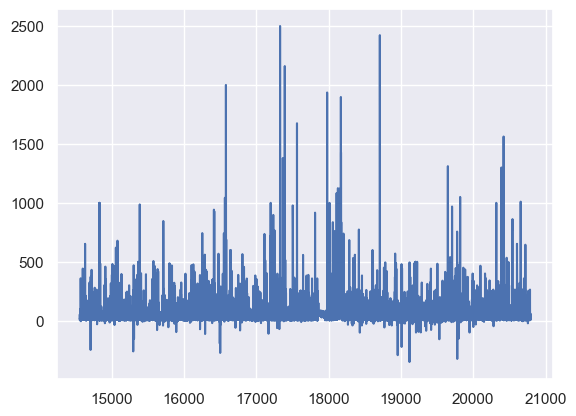

In [87]:
test_set.plot()

Now, we focus in detect anomalies. In this case, I used the One-Class SVM (Support Vector Machine). My idea is focus on one class (usually the majority class) and identifies instances that deviate significantly from the norm. Instead of a hyperplane as is usual in traditional SVMs methods, the One-Class SVM uses a hypersphere to encompass all instances of the target class. My goal is to find the hypersphere with the largest possible margin that contains most of the data points.

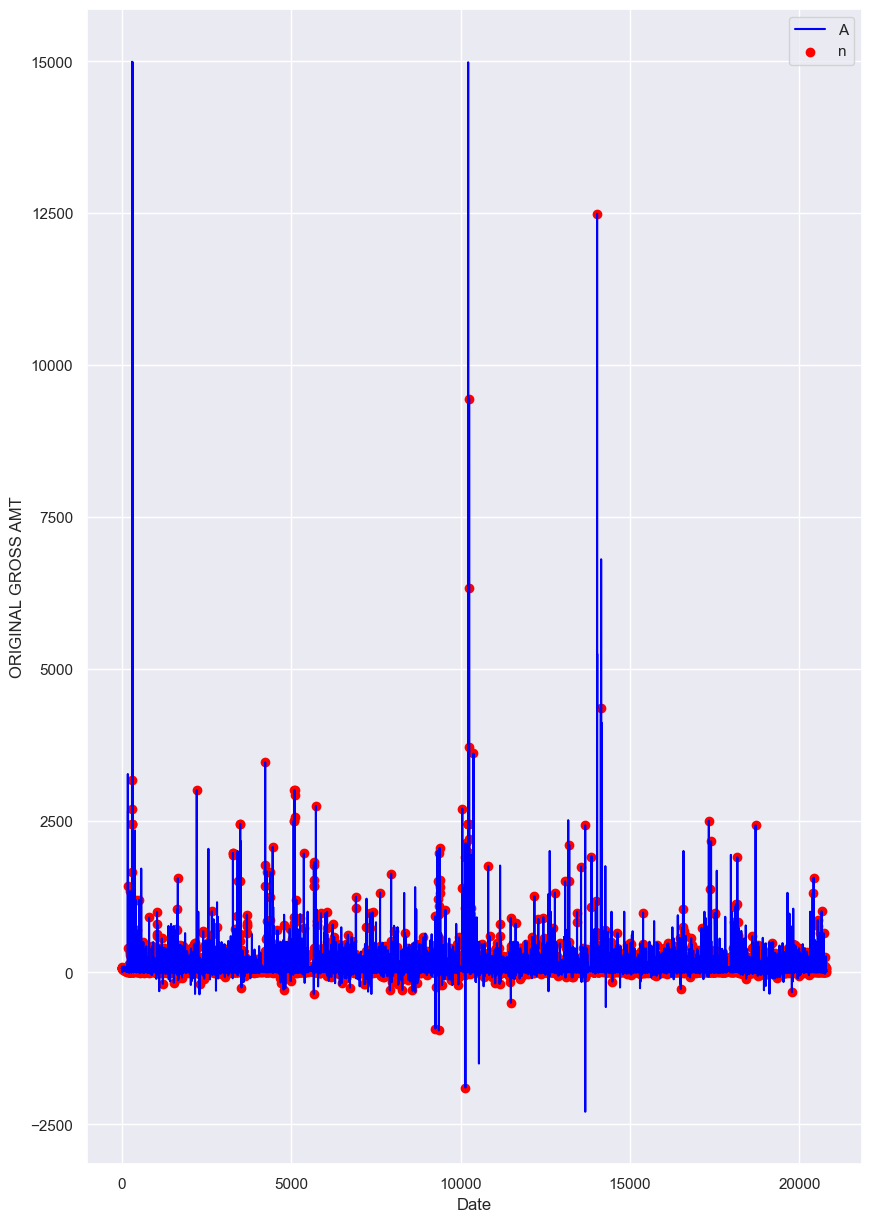

In [88]:
# Training the One-Class SVM model 

ocsvm_model = OneClassSVM(gamma ="auto",nu=0.0025).fit(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_model.predict(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_decision_func = ocsvm_model.decision_function(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_score = ocsvm_model.score_samples(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))

df['INT_TIME'] = df.index.astype(np.int64)
df['ocsvm_decis_func'] = ocsvm_decision_func
anomaly = df.loc[df['ocsvm_decis_func']<0, ['INT_TIME','ORIGINAL GROSS AMT']]
normal = df.loc[df['ocsvm_decis_func']>=0, ['INT_TIME','ORIGINAL GROSS AMT']]

fig, ax = plt.subplots(figsize=(10,15))
ax.plot(df['INT_TIME'],df['ORIGINAL GROSS AMT'], color='blue',label='Normal')
ax.scatter(anomaly['INT_TIME'],anomaly['ORIGINAL GROSS AMT'], color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('ORIGINAL GROSS AMT')
plt.legend('Anomaly detection using OCSVM')
plt.show()

In [89]:
anomaly_fraction = len(anomaly)/len(df['ORIGINAL GROSS AMT'])
anomaly_fraction

0.32325078143784564

You can see in the last graph the different points marked in red, these indicate possible anomalies in the behavior of the transactions or those that do not follow the norm.

# Forecasting future transactional behavior

In [90]:
# splitting training set and test test ona 70%:30% basis from the normal dataset extracted from oncsvm anomaly detection
normal_original_gross_amt = normal['ORIGINAL GROSS AMT']

train_set = normal.iloc[0:int(len(normal)*0.7),1]
train_set.index = pd.DatetimeIndex(train_set.index).to_period('D')
test_set = normal.iloc[int(len(normal)*0.7)+1:len(normal),1]
test_set.index = pd.DatetimeIndex(test_set.index).to_period('D')

predicted=68.000000, expected=68.000000
predicted=68.000000, expected=60.000000
predicted=60.000000, expected=6.500000
predicted=6.500000, expected=63.490000
predicted=63.490000, expected=96.300000
predicted=96.300000, expected=82.740000
predicted=82.740000, expected=75.540000
predicted=75.540000, expected=77.210000
predicted=77.210000, expected=51.270000
predicted=51.270000, expected=67.080000
predicted=67.080000, expected=69.340000
predicted=69.340000, expected=67.820000
predicted=67.820000, expected=71.400000
predicted=71.400000, expected=48.230000
predicted=48.230000, expected=93.190000
predicted=93.190000, expected=81.000000
predicted=81.000000, expected=66.280000
predicted=66.280000, expected=87.540000
predicted=87.540000, expected=55.000000
predicted=55.000000, expected=73.000000
predicted=73.000000, expected=60.000000
predicted=60.000000, expected=66.730000
predicted=66.730000, expected=68.000000
predicted=68.000000, expected=77.000000
predicted=77.000000, expected=57.000000
pr

predicted=232.000000, expected=500.000000
predicted=500.000000, expected=49.850000
predicted=49.850000, expected=8.990000
predicted=8.990000, expected=7.990000
predicted=7.990000, expected=30.250000
predicted=30.250000, expected=5.990000
predicted=5.990000, expected=20.000000
predicted=20.000000, expected=60.000000
predicted=60.000000, expected=35.000000
predicted=35.000000, expected=35.000000
predicted=35.000000, expected=53.000000
predicted=53.000000, expected=91.160000
predicted=91.160000, expected=27.930000
predicted=27.930000, expected=158.880000
predicted=158.880000, expected=50.340000
predicted=50.340000, expected=41.940000
predicted=41.940000, expected=83.790000
predicted=83.790000, expected=1404.880000
predicted=1404.880000, expected=322.360000
predicted=322.360000, expected=-322.360000
predicted=-322.360000, expected=906.160000
predicted=906.160000, expected=91.500000
predicted=91.500000, expected=-0.250000
predicted=-0.250000, expected=44.740000
predicted=44.740000, expected

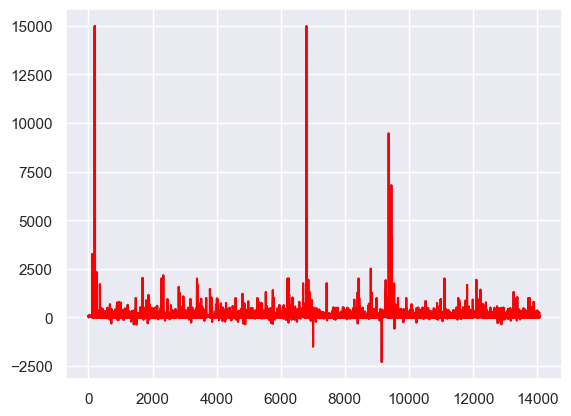

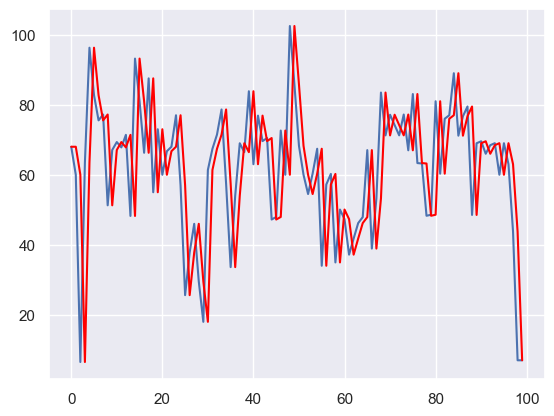

In [91]:
series = normal['ORIGINAL GROSS AMT']

X = series.values
window = 1

history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

### ARIMA model

ARIMA models are used to make predictions about the future. Modeling a time series in an ARIMA model consists of determining a model that allows making a forecast of the variable at a future instant in time based on past values.

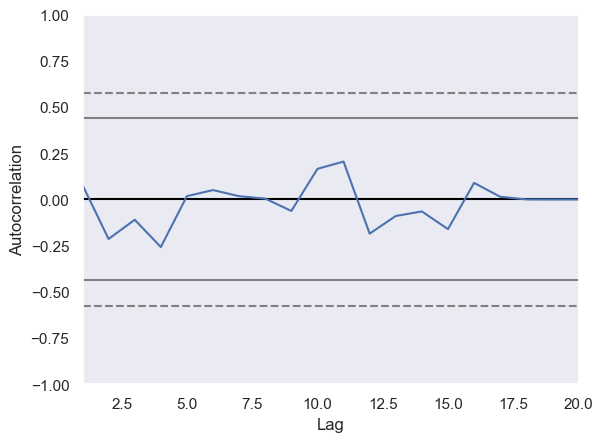

<Figure size 2500x2000 with 0 Axes>

In [92]:
# Forecasting using the ARIMA model

autocorrelation_plot(train_set[0:20])
plt.figure(figsize=(25,20))
plt.show()

In [93]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train_set, order=(2,0,7))
arima_model_fit = arima_model.fit()

In [94]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     ORIGINAL GROSS AMT   No. Observations:                 9851
Model:                 ARIMA(2, 0, 7)   Log Likelihood              -72014.441
Date:                Wed, 07 Feb 2024   AIC                         144050.882
Time:                        00:48:11   BIC                         144130.031
Sample:                    01-01-1970   HQIC                        144077.694
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.6189     14.770      6.068      0.000      60.670     118.568
ar.L1         -0.1411      0.013    -11.055      0.000      -0.166      -0.116
ar.L2          0.3321      0.014     23.065      0.0

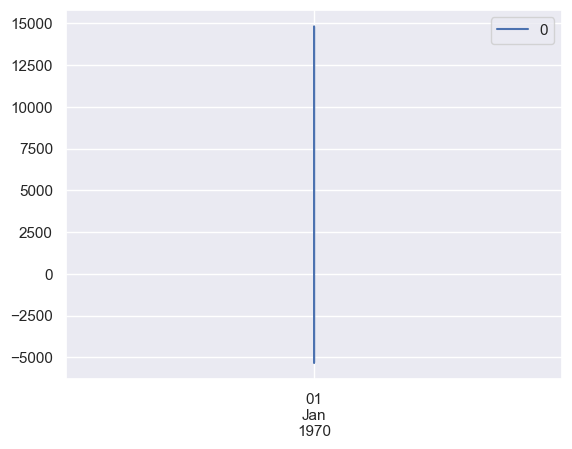

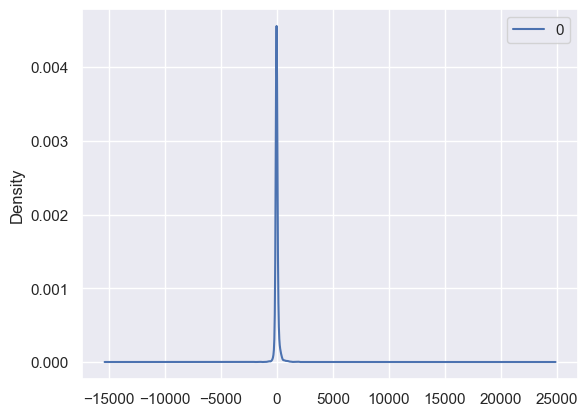

                  0
count   9851.000000
mean      -0.005077
std      361.931320
min    -5316.852973
25%      -59.812640
50%      -29.271457
75%       14.252457
max    14807.920600


In [95]:
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [96]:
# history = [x for x in train_set]
# predictions = list()
# # walk-forward validation
# for t in range(len(test_set)):
#     model = ARIMA(history, order=(0,1,5))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test_set[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test_set, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.plot(test_set)
# plt.plot(predictions, color='red')
# plt.show()

### tooo much time for my PC

In [97]:
# Execution time is 22-26 minutes more less

arima_model = auto_arima(train_set, start_p = 1, d = 0, start_q = 5, 
			 max_p = 2, max_d = 1, max_q = 7, start_P = 2,
			 max_Q = 2, m = 12, seasonal = True,
			 error_action = 'warn', trace = True,
			 supress_warnings = True, setpwise = True,
			 random_state = 20, n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(1,0,5)(2,0,1)[12] intercept   : AIC=inf, Time=86.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=146253.762, Time=0.33 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=144552.112, Time=3.37 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=144951.746, Time=3.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=146722.438, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=144550.150, Time=0.65 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=144552.111, Time=2.69 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=144554.111, Time=9.89 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=144507.882, Time=0.87 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=144509.831, Time=4.29 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=144509.831, Time=3.88 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=144511.831, Time=9.95 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=144497.402, Time=4.55 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=144499.063, Time=17.49 

In [98]:
arima_model_fit = arima_model.fit(train_set)

In [99]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9851
Model:               SARIMAX(2, 0, 5)   Log Likelihood              -72064.656
Date:                Wed, 07 Feb 2024   AIC                         144147.312
Time:                        01:14:40   BIC                         144212.070
Sample:                    01-01-1970   HQIC                        144169.249
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.9647      4.377      5.931      0.000      17.385      34.544
ar.L1          1.1240      0.008    146.711      0.000       1.109       1.139
ar.L2         -0.4098      0.008    -51.334      0.000      -0.425      -0.394
ma.L1         -0.7597      0.008    -93.765      0.000      -0.776      -0.744
ma.L2          0.2309      0.008     30.245      0.000       0.216       0.246
ma.L3         -0.0531      0.003    -15.992      0.000      -0.060      -0.047
ma.L4         -0.0207      0.004     -5.769      0.000      -0.028      -0.014
ma.L5          0.1831      0.001    127.514      0.000       0.180       0.186
sigma2      1.308e+05    166.001    787.817      0.000     1.3e+05    1.31e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         269785871.11
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            22.06
Prob(H) (two-sided):                  0.00   Kurtosis:                       812.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

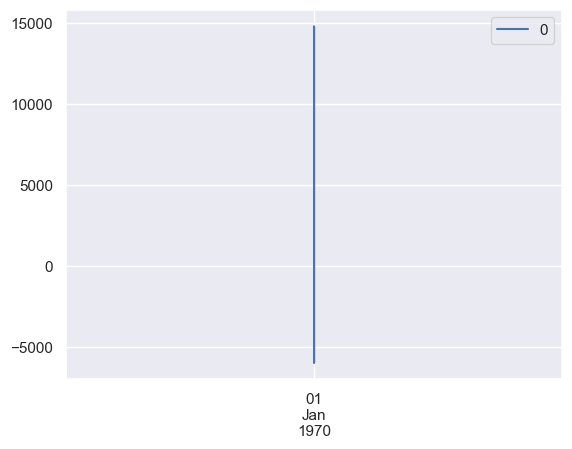

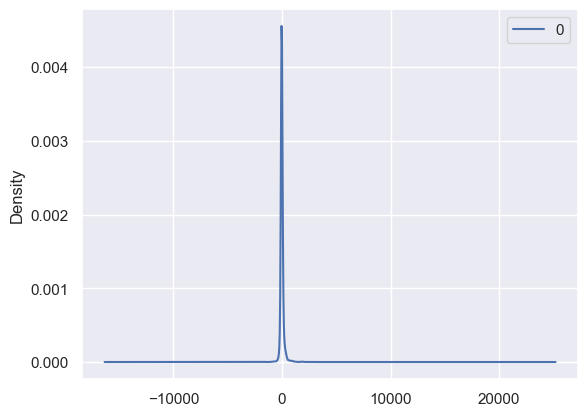

                  0
count   9851.000000
mean      -0.602104
std      363.770554
min    -5960.314617
25%      -58.861716
50%      -31.328519
75%       11.048152
max    14802.789581


In [100]:
residuals = pd.DataFrame(arima_model_fit.resid())
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [1]:
auto_arima_predictions = pd.DataFrame()
auto_arima_predictions['ORIGINAL GROSS AMT'] = test_set
auto_arima_predictions['predicted'] = arima_model_fit.predict(n_periods = len(test_set))

NameError: name 'pd' is not defined

<Axes: >

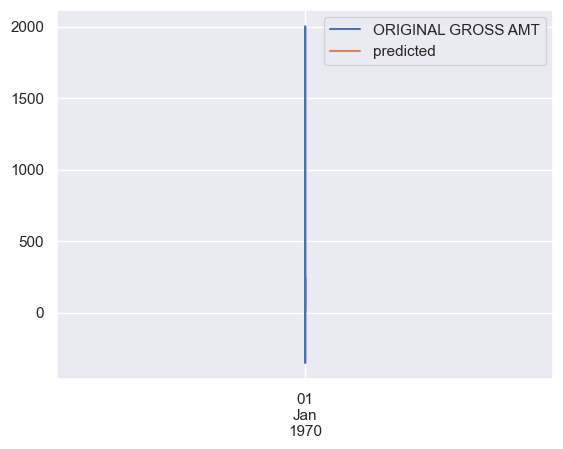

In [102]:
auto_arima_predictions.plot()

In [103]:
df[['ORIGINAL GROSS AMT','ocsvm_decis_func']]

,ORIGINAL GROSS AMT,ocsvm_decis_func
0,68.00,5.107846e-04
1,68.00,5.107846e-04
2,60.00,4.377843e-04
3,75.00,-1.996331e-04
4,75.00,-1.996331e-04
...,...,...
20790,10.00,-9.869623e-07
20791,54.98,3.774079e-04
20792,60.06,4.088152e-04
20793,8.99,1.123348e-04


In this case, the ARIMA model is not as accurate as the first approach was, perhaps due to the range of data used.

# General conclusions:

* The preprocessing exercise in heterogeneous data sources always is  is required to unify the data structure for future analysis and understanding.

* Clustering process gives disagreeing information for the candidates' variables and the "spend" target variable. For example, the cluster model classifies transactions of the same category in different time points in distinct buckets. 

*  The proposed fraud identification model requires a very good regressor to obtain a reliable expenditure estimate, in another hand, the results obtained with the test data suggest that the regression models constructed are not reliable. It implies that the classification model would not be reliable either. 

* The time-series analysis of the monthly expenditure on the "directorate" and "trans cac desc 1" fields, allows exploiting the data employing evolutionary graphs, histograms, and business reports, which can be used to audit the expenditure and perform a cost reduction process according to the business sense.

* It is important to be able to establish an adequate communication channel with the client, to understand the business sense of the data involved in the analysis. The expert information could help develop a better model and find hidden relationships more easily. Additionally, this allows being in tune with the business point of view, with the customer's requirements, capabilities, and infrastructure.


# Ideas or other approaches for the future

By having so many categorical, text-type variables, natural language processing could be performed and these results used as input for grouping or predictions.


Visualize the clusters created with 3-dimensional graphs to analyze how distinguishable they were from each other. For this, it would be a good idea to have more historical information about clients: age, years of membership, type of card, number of installments...